# Kümeleme

IRIS veri seti


Iris Veri Seti, 3 farklı türde İris çiçeklerinin bilgilerini içeren bir veri setidir.

Her bir çiçek için petal ve sepal (taç yaprak ve çanak yaprak) uzunluk ve genişliği ölçülmüştür.

150 adet bireyin ölçümleri ve tür bilgileri vardır.

https://en.wikipedia.org/wiki/Iris_flower_data_set


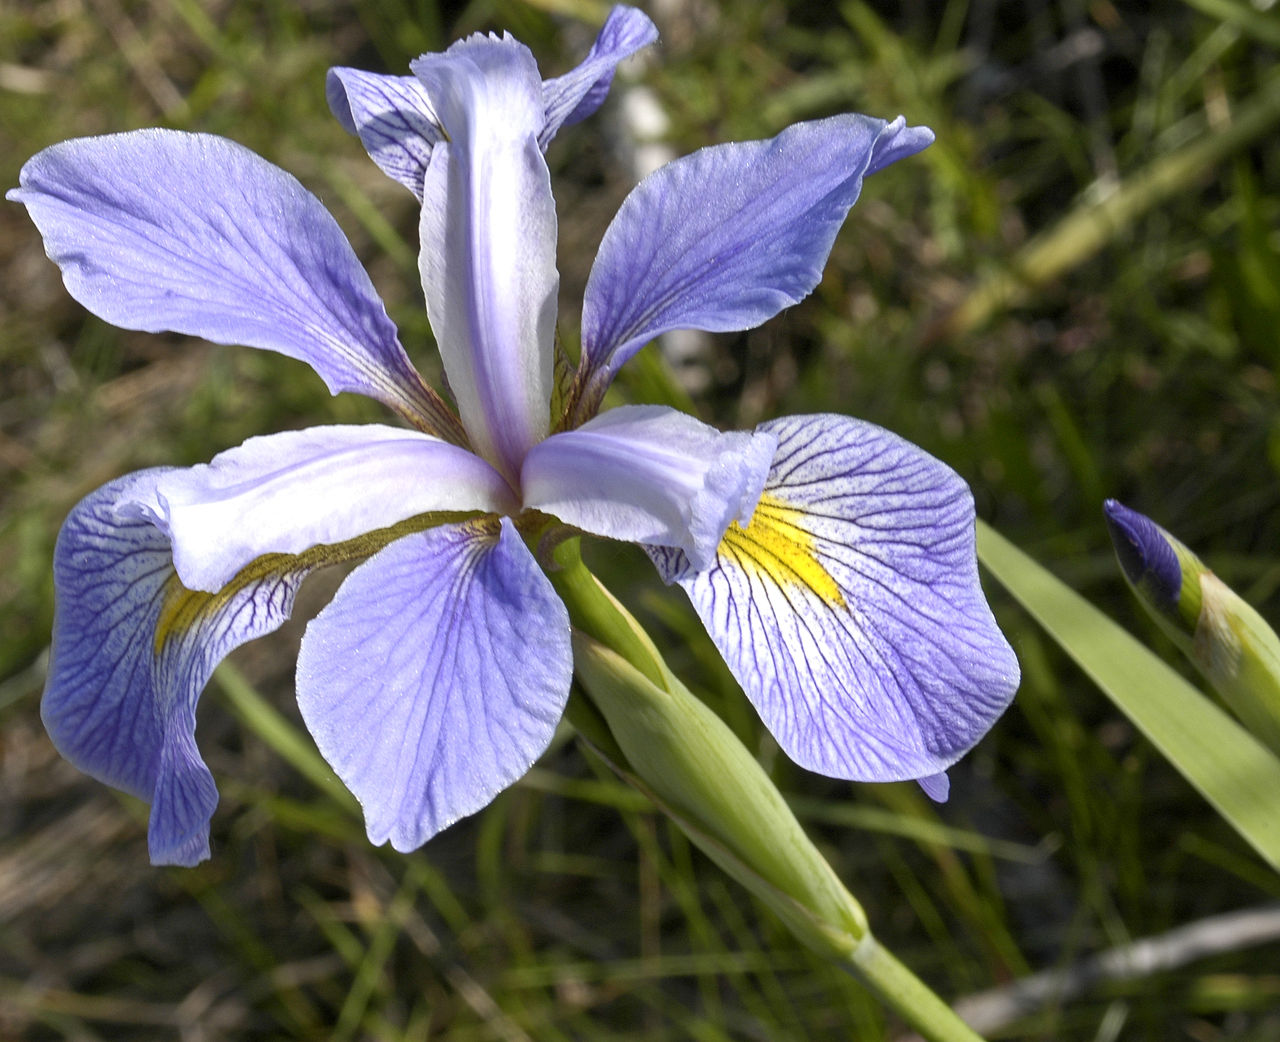
Iris Virginica

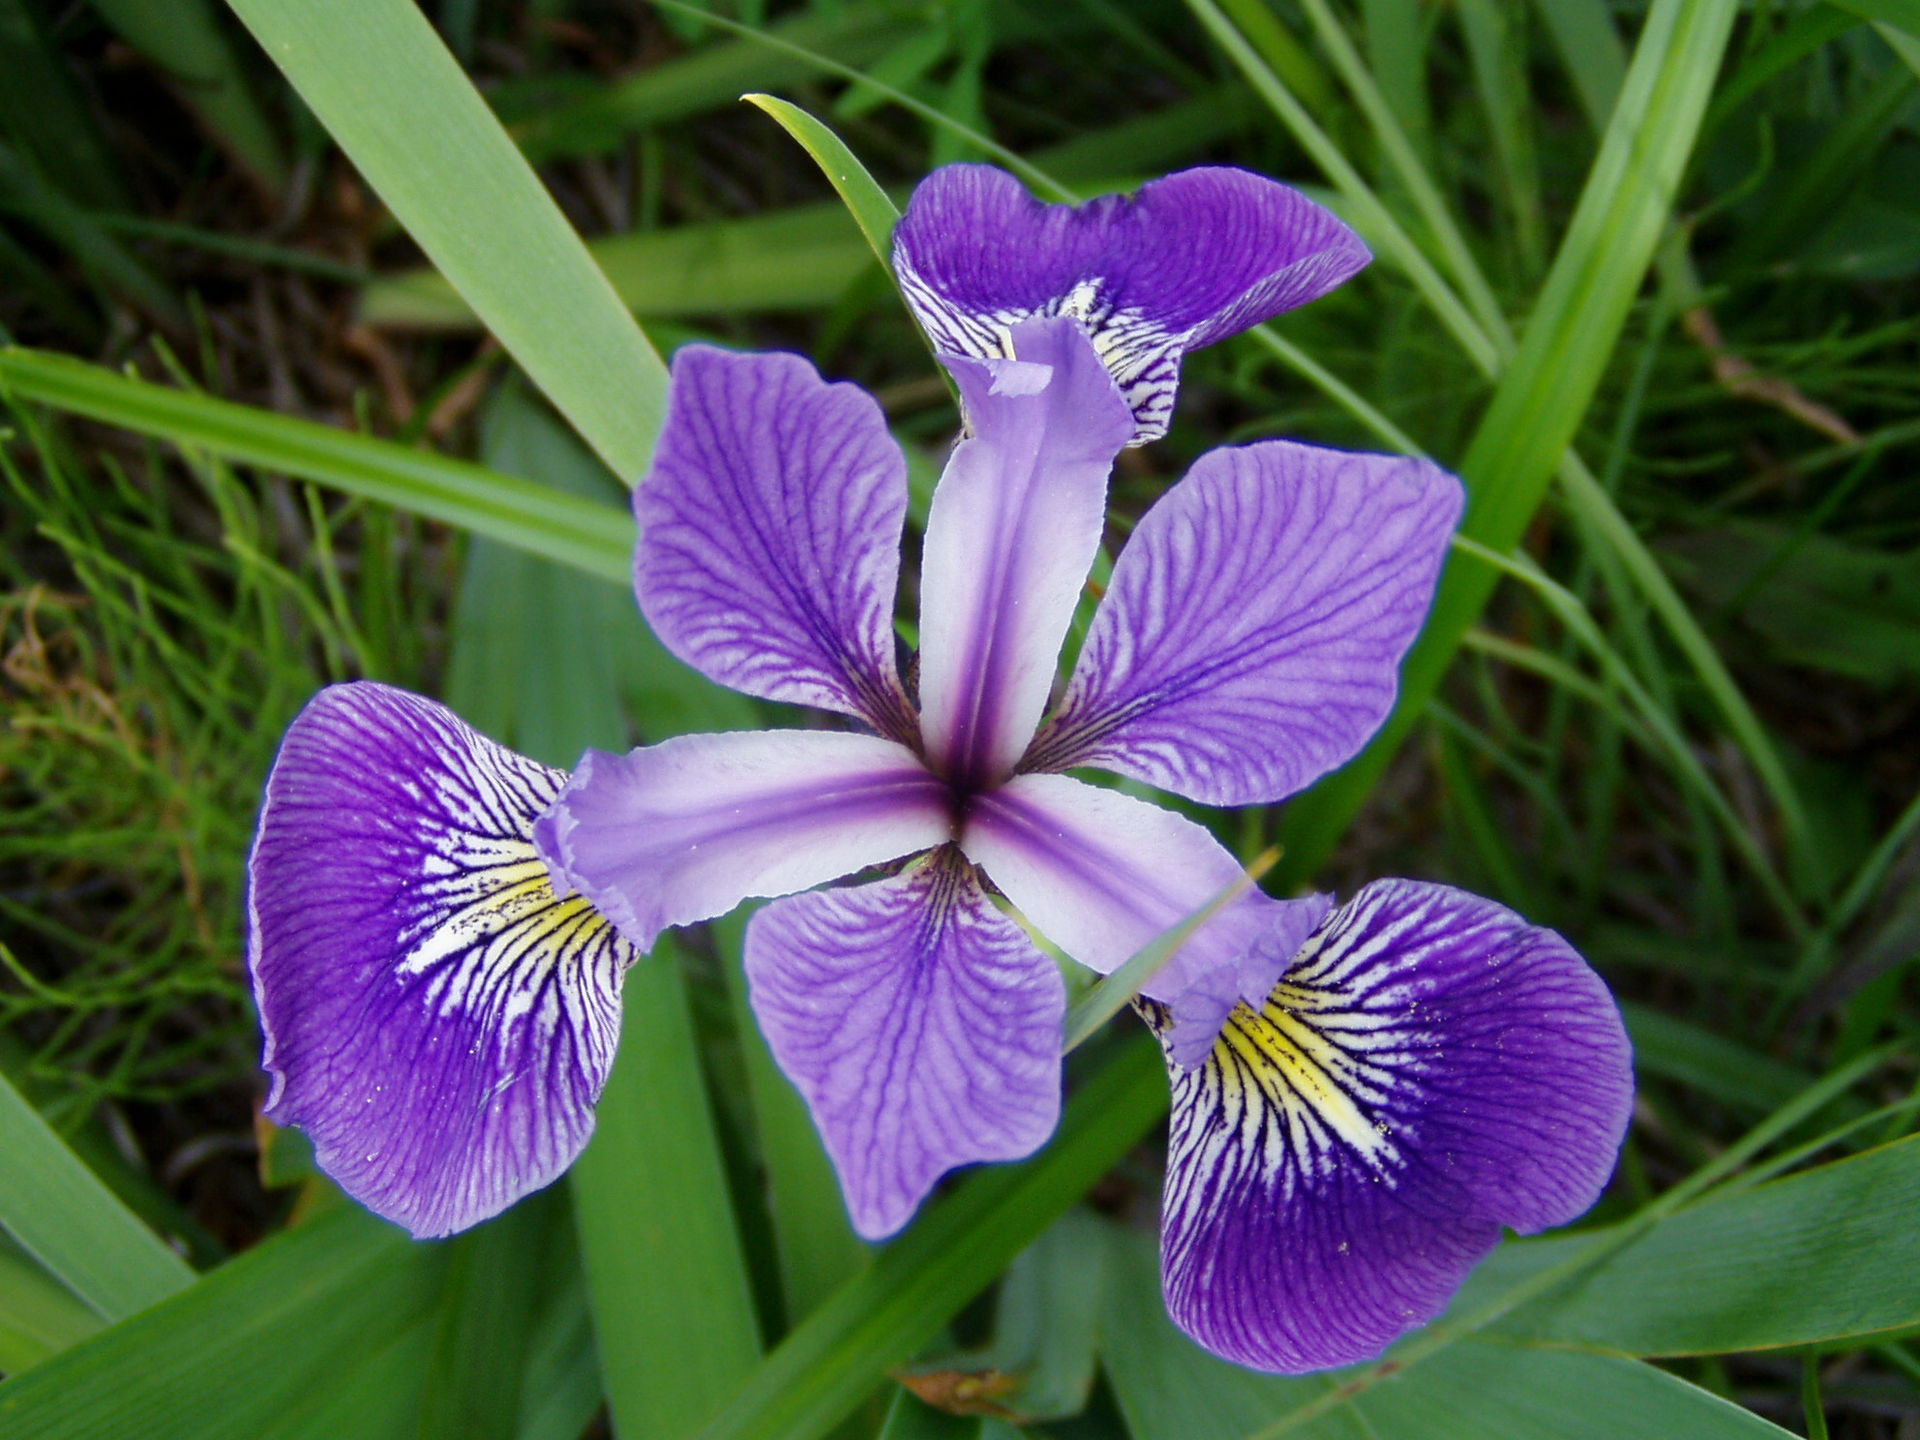
Iris Versicolor

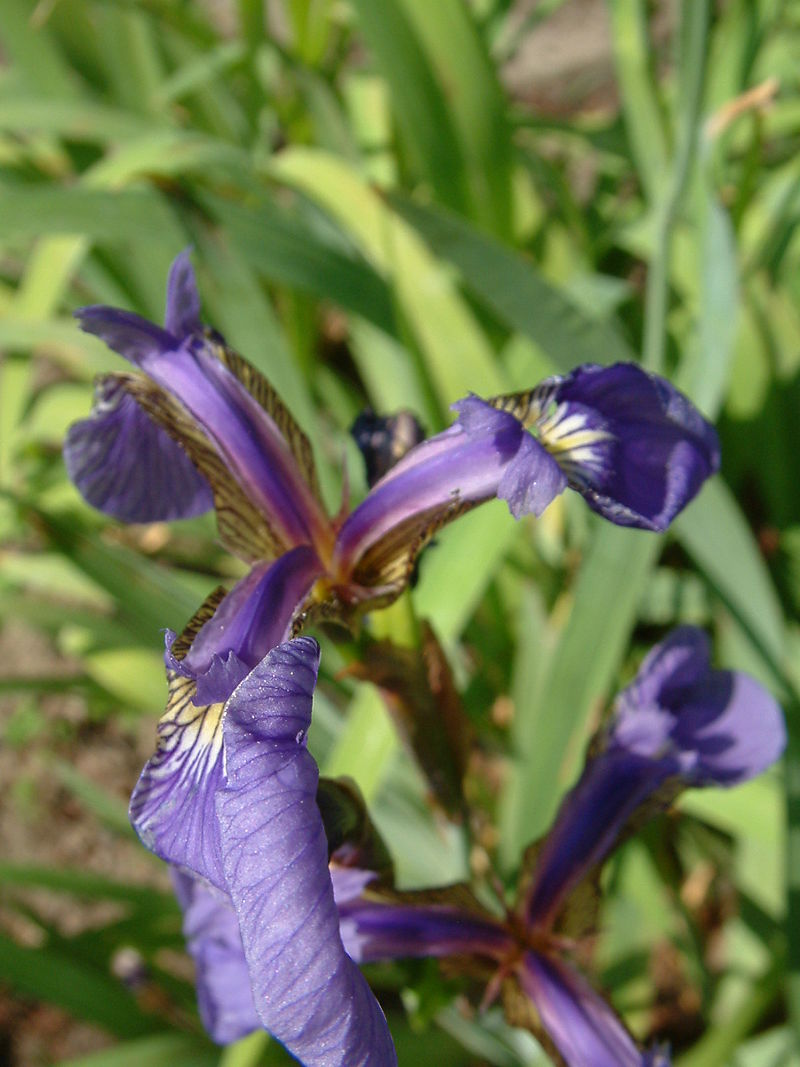
Iris Setosa

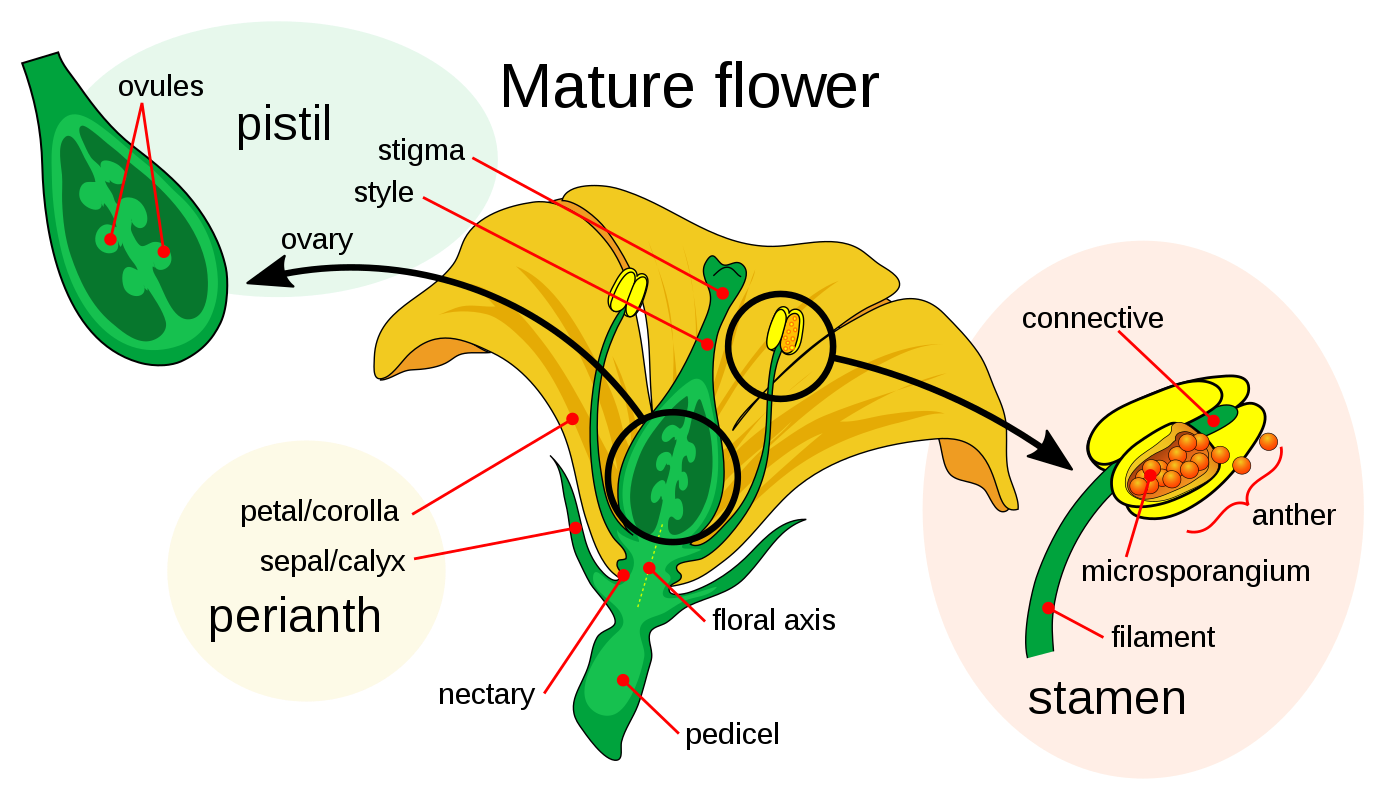
Taç Yaprak ve Çanak Yaprak

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()

print(iris)

In [ ]:
print(iris['data'])

In [ ]:
print(iris['feature_names'])

In [ ]:
print(iris['target'])

In [ ]:
print(iris['target_names'])

Veri setimizi pandas ile işleyebilmek için bunu bir pandas data frameine çevirelim.

In [ ]:
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
data['target'] = iris['target']   # BURASI BILINEN NETICELERI ICERIYOR

Verilere bakin

In [ ]:
#buraya ilk 20 satiri gosteren komutu yazin

Veri setimize bakalim, pandas bizim veri setimizi bize tarif etsin.

In [ ]:
data.describe()

Bu veriler hakkında ne söyleyebilirsiniz?

















Veri setimizi ekledik, simdi eksik veri olup olmadigina bakalim.

In [ ]:
missing = data.isna().sum()  #eksik olan verileri her bir sutun icin topla
print(missing)

Veri setimizde hic bir eksik yok.

Olsaydı ne yapmalıyız?

Eksikli verileri silebiliriz.
Bolsuklari doldurabiliriz.
   Ortalama değer ile doldurabiliriz (mean)
   Ortanca değer ile doldurabiliriz (median)

In [ ]:
print(data.median())

In [ ]:
#eksik satirlari tamamen silmek icin
#data = data.dropna(axis=0) #axis 0 satirlar, axis 1 sütunlar

# eksik olsaydi bunu kullanabilirdik
#data = data.fillna( data.median() )  #ortanca
#data = data.fillna( data.mean() )  #ortalama


In [ ]:
data.mean()

# Veri Gorselleme

Veri setimizi görselleyelim. Verimize daha aşina oluruz.

Verilerimizin ne oldugun biliyoruz bu veri setinde (ama bilmiyormus gibi yapip bulmaya calisacagiz). Once bir verilerimize bakalim.

Çanak Yaprakların kalınlık ve uzunluklarına göre çizdirelim. Her bir türe ait bilgileri farklı bir renkte çizdirelim.

In [ ]:


plt.rcParams['figure.figsize'] = [10, 10] # gorselimizin boyutunu ayarlayalim.

ax = data.plot.scatter(x='sepal length (cm)', y = 'sepal width (cm)', c='target',s=40, colormap='viridis')
plt.show()

Aynı işlemi taç yapraklar için yapalım.

In [ ]:
ax2 = data.plot.scatter(x='petal length (cm)', y = 'petal width (cm)', c='target', s=40,colormap='viridis')
plt.show()

Taç yapraklar verileri için ne söyleyebiliriz?

In [ ]:

#%matplotlib inline 
#notebook


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['sepal length (cm)'], data['sepal width (cm)'], data['petal length (cm)'],c=data['target'],s=200, marker='^',cmap='viridis')


ax.set_xlabel('sepal length')
ax.set_ylabel('sepal with')
ax.set_zlabel('petal length')

plt.show()

Verilerimizden tür bilgisini silelim.

In [ ]:
dataFull = data  # butun datamizi saklayalim
data = data.drop(['target'], axis = 1)  # türe aitlik bilgilerini sildik

dataFull.to_csv('iris.csv')

In [ ]:
dataFull.head()

In [ ]:
data.head()

Verilerimizde tür bilgisini gizleyeceğiz. Verimiz neye benzeyecek?

In [ ]:
#buraya tür bilgisi (renk) olmadan verileri çizdirin. Çanak yapraklar ve Taç yapraklar için birer grafik.


Bütün degerleri birden aynı anda görmemiz çok zor çünkü 4 tane farklı boyutumuz var.

PCA kullanarak verilerimizin boyutun düşürebiliriz, daha rahat görürüz. Bağlantılı boyutlar var ise bunları indirgememizi de sağlayabilir.


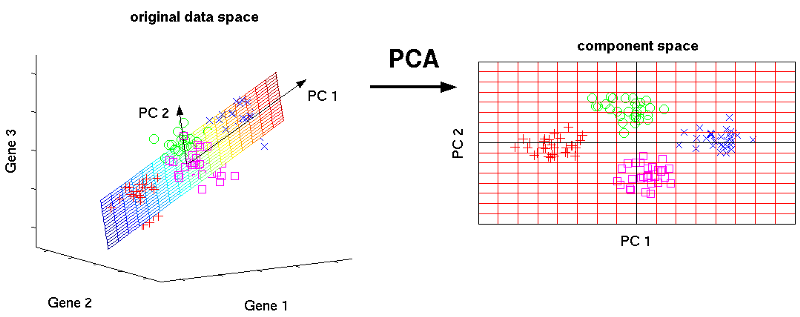

Bu işlenecek olan verilerin boyutu düştüğünden bu yapacağımız işlemleri ve bulabileceğimiz kümeleri olumsuzetkileyecektir. PCA işlemi bize ne kadar veri kaybı olacağını bildirir.

# SKLEARN Kütüphanesi

Verilerimizi incelemek için sklearn kütüphanesini kullanacağız. Detaylı bilgi için aşağıdaki linke tıklayın. https://scikit-learn.org/stable/index.html

In [ ]:
import collections
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm

collections bize python un standart dict, list, set continerlarına (veri tutucu) alternatif container tipleri verir.

matplotlib cm, bize renk haritası kullanmamıza olanak sağlar.


Verimiz kaç boyutlu? Bunu sağlıklı bir şekilde kaç boyuta indirebiliriz?

Bunun için verilerimiz biribiri ile ne kadar bağlantılı incelememiz lazım.

Korelasyon matrisleri bu işlevi görürler.

Korelasyon matrisimize bakalim

In [ ]:
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Yukarıdaki korelasyon matrisinden verilerimizi iki boyuta indirgediğimizde çok fazla veri kaybımızın olmayacağını anlıyoruz.

In [ ]:
# 2 PCA kullanarak iki boyuta indirelim
pca = PCA(n_components = 2, random_state=2)
X_pca = pca.fit_transform(data)

print('Explained Variance Ratio : ' + str(pca.explained_variance_ratio_.cumsum()[1]))

print(X_pca)

0.97, bilgi kaybimiz cok az.

Explained Variance Ratio, verilerimizdeki farkliligin nekadarini muhafaza ettigimizi gosterir.

0 bütün bilgiyi kaybettik
1 hiç bilgi kaybetmedik

Genel olarak variance'in %90 dan fazla çıkması istenir. 


Kümeleme yapılacağı zaman K-Means algoritması çok kullanılan hızlı algoritmalardan biridir. 
Kaç kümeye bölmesini istediğimizi önceden bildirmemiz gerekir. Algoritma hızlı olduğu için farklı küme sayıları ile çalıştırılıp neticelere bakılabilir.

my_model = PCA(n_components=0.99)

Eğer boyut sayısını 0 , 1 arasında seçersek, kendisi otomatik olarak explained variance ratio istedigimiz degerin altinda olmayacak sekilde ayarlar.

# Kmeans

In [ ]:
#https://www.youtube.com/watch?v=nXY6PxAaOk0
from IPython.lib.display import YouTubeVideo
YouTubeVideo('nXY6PxAaOk0')

In [ ]:
inertialar = []  # bir liste olusturalim
K_lar = range(1, 30)  # 1 den 5 e, 6 dahil degil

for i in K_lar:    # her bir k degeri icin
    # Modelimizi yaratalim
    model = KMeans(
            n_clusters=i,     # sirayla 1,2,3,4,5
            init='k-means++',   # algoritma secimi
            # n_init=10,
            # max_iter=300,
            # n_jobs=-1,        #-1 hepsi
            random_state=1)   # rastgele sayi ureteci
    
    model.fit(X_pca) 
    inertialar.append(model.inertia_)  # her bir neticeyi bu listeye ekleyelim

plt.plot(K_lar, inertialar, marker='o')
plt.xlabel('Küme sayısı (k)')
plt.ylabel('Distortion')
plt.show()

In [ ]:
print(inertialar)

Inertia: Elemanların bulundukları kümenin merkezine olan uzaklığının karelerinin toplamı.

Kare olmasının etkileri ve avantajları: Sadece pozitif sayılar verir. (İki uçtaki eleman biribirini götürmez)
Merkeze yakın elemanların etkisi daha azdır, uzaktakilerin daha fazladır.


KMeans algoritmasının sklearn kütüphanesindeki uygulanış şekli ile ilgili detaylar için aşağıdaki linki tıklayın: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Bu grafikten dirsek olarak gördüğümüz değeri alalım.


In [ ]:
en_guzeli = 3

Modelimizi yeniden egitelim

In [ ]:
# En guzeli ile modelimizi yeniden olusturalim.
model = KMeans(
    n_clusters= en_guzeli,
    init='k-means++',
    # n_init = 10,
    # max_iter=300,
    # n_jobs=-1,
    random_state=1)

model = model.fit(X_pca) # modelimize verilerimizi verelim

y = model.predict(X_pca) # neticeleri alalim


Neticelerimiz ne???


In [ ]:
print(y)

In [ ]:
print(y.shape)

### Sırasıyla her bir örnegin hangi kümeye ait olduğu bilgisi. 3 kümemiz olduğu için 0,1,2 numaralı kümelerimiz var.

Modelimizin sonuçlarını farklı kümelere göre renklendirelim

X_pca daki her bir elemana bir renk vereceğiz. peki X_pca neye benzer?


In [ ]:
X_pca.shape

In [ ]:
print(X_pca)

In [ ]:
print(X_pca[0,0])

PCA yapılmış verideki bütün 2 numaralı küme x lerini ve y lerini yazdıralım

In [ ]:
print(X_pca[y==2,0],X_pca[y==2,1])

In [ ]:
plt.figure(figsize=(10, 10)) # resmimizin boyutlariyla oynayalim
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 50, alpha=0.9 , c = y, label = 'Kümeler',cmap='viridis')

In [ ]:
# teker teker her kumeye istedigimiz rengi vermek istesek...

plt.figure(figsize=(10, 10)) # resmimizin boyutlariyla oynayalim
#neticeler listesindeki 0 olan bütün indexler.
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s = 50, c = 'yellow', label = 'Küme 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s = 50, c = 'green', label = 'Küme 2')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], s = 50, c = 'red', label = 'Küme 3')
#plt.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], s = 50, c = 'pink', label = 'Küme 4')
#plt.scatter(X_pca[y == 4, 0], X_pca[y == 4, 1], s = 50, c = 'turquoise', label = 'Küme 5')
#plt.scatter(X_pca[y == 5, 0], X_pca[y == 5, 1], s = 50, c = 'magenta', label = 'Küme 6')
#plt.scatter(X_pca[y == 6, 0], X_pca[y == 6, 1], s = 50, c = 'purple', label = 'Küme 7')
#plt.scatter(X_pca[y == 7, 0], X_pca[y == 7, 1], s = 50, c = 'brown', label = 'Küme 8')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Merkezler')
plt.title('Cicek Turu Kümeleri')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Gercekte ne olacakti?
plt.figure(figsize=(10, 10)) # resmimizin boyutlariyla oynayalim

#gercek bilgileri gostertecek kodu buraya yazin
#KOPYA g_pca

#veya karsilastirmak icin
#KOPYA datayi_ustuste_gosterme

plt.title('Çiçek Türü Kümeleri')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid()
plt.show()

Kümelerimizde kaçar eleman var bakalım.

In [ ]:
print('K Means Neticesi : ')
print(collections.Counter(y))

Kumeleme neticesini data Full isimli veri yapimiza ekleyelim, daha sonra karşılaştırma için faydalı olur.

In [ ]:
#Bu kodu mumkunse sadece 1 kere kosturun
y_df = pd.DataFrame(y, columns=['PCA_kmeans3'])  # tek sutun kumeleme neticelerini olustur

dataFull = pd.concat([dataFull, y_df], axis=1)          # kumeleme neticelerini datamiza ekle

In [ ]:
dataFull.head()

Bu kümeleri biraz inceleyelim. Gölge veya izdüşümlerine bakarak faydalı bilgiler edinebiliriz.

## Silhouette uzerine hatirlatma

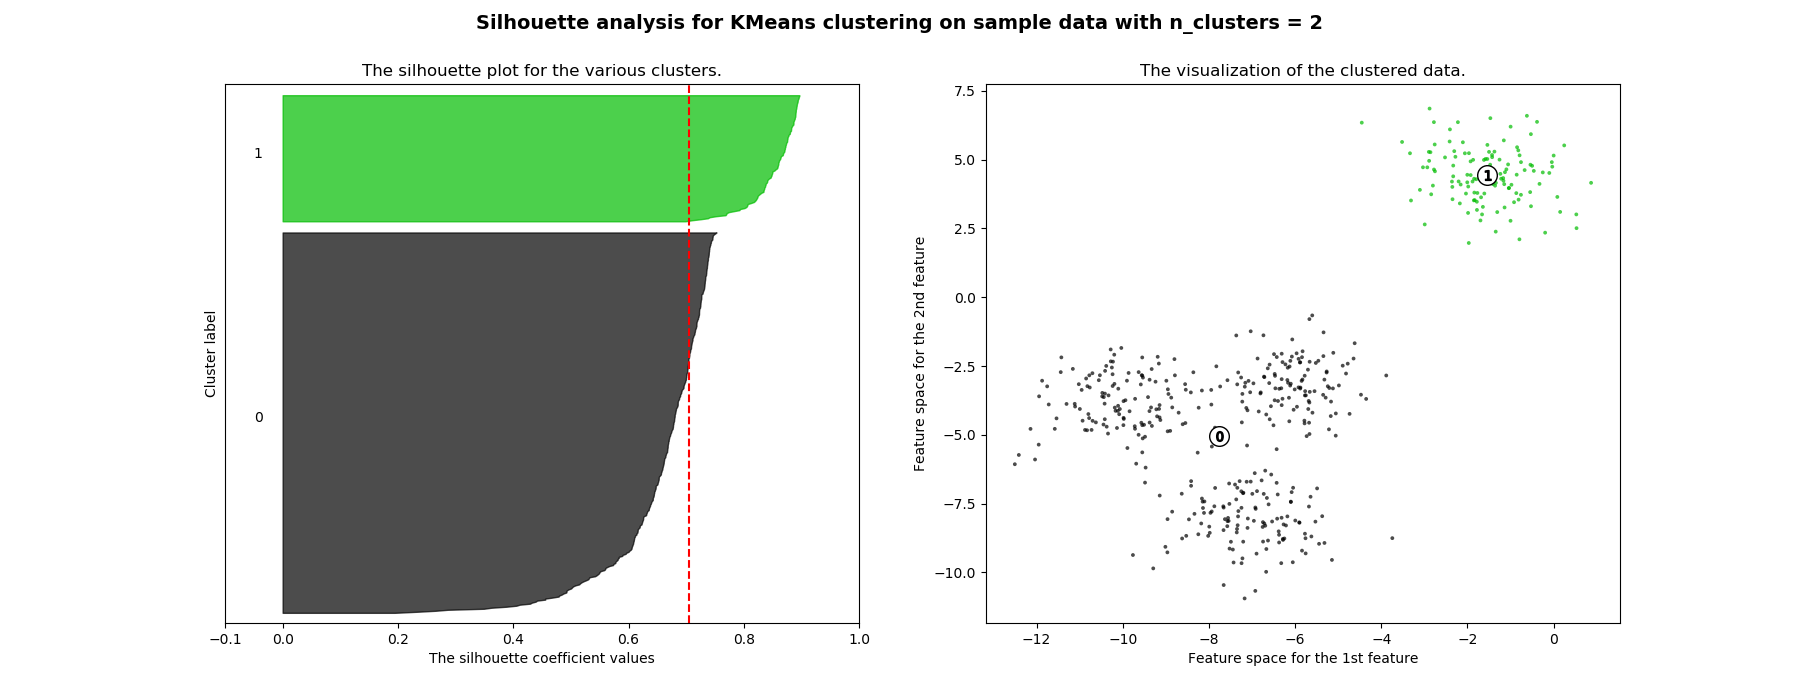

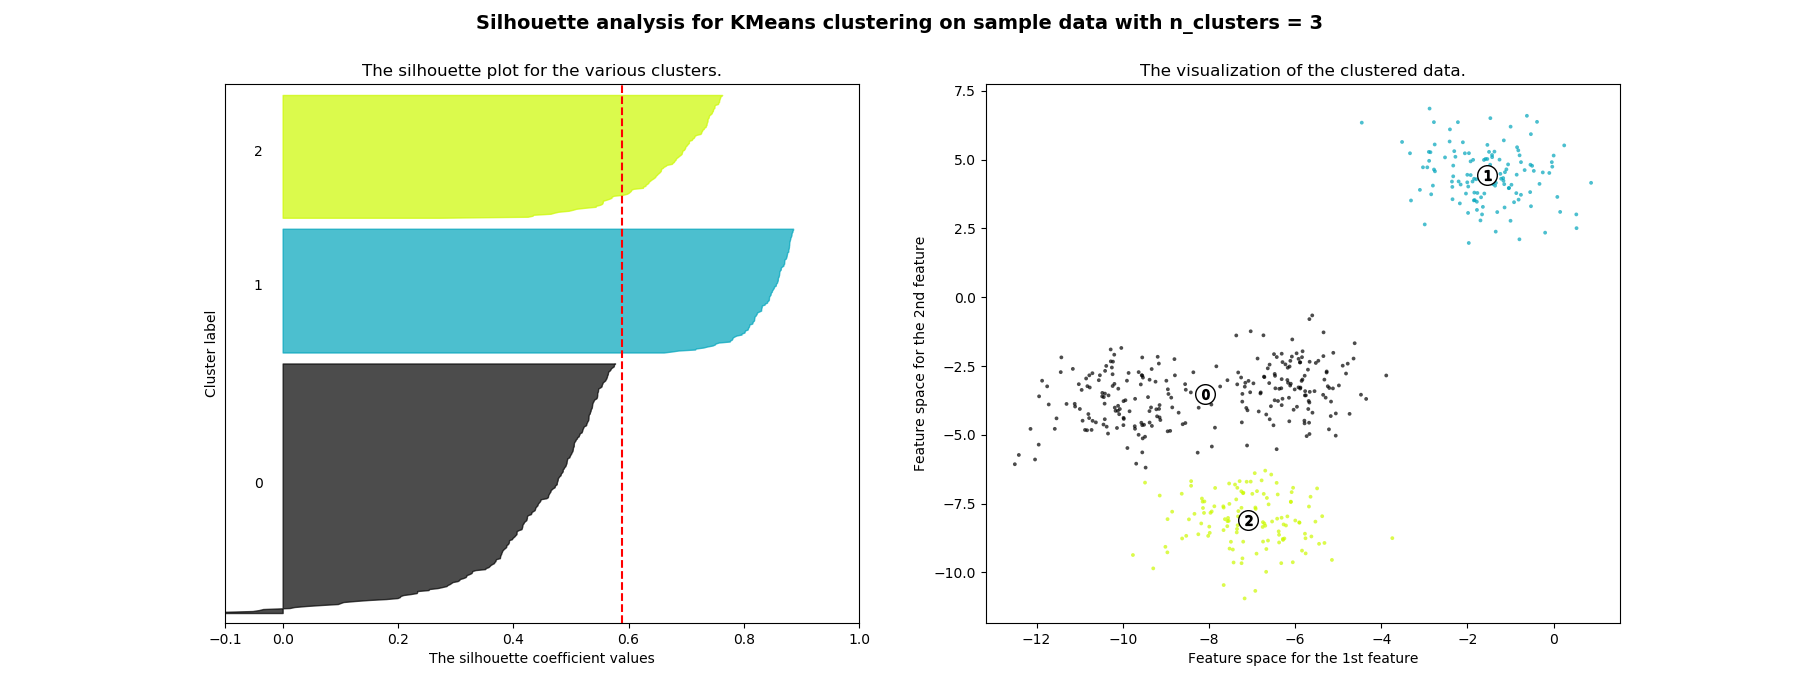

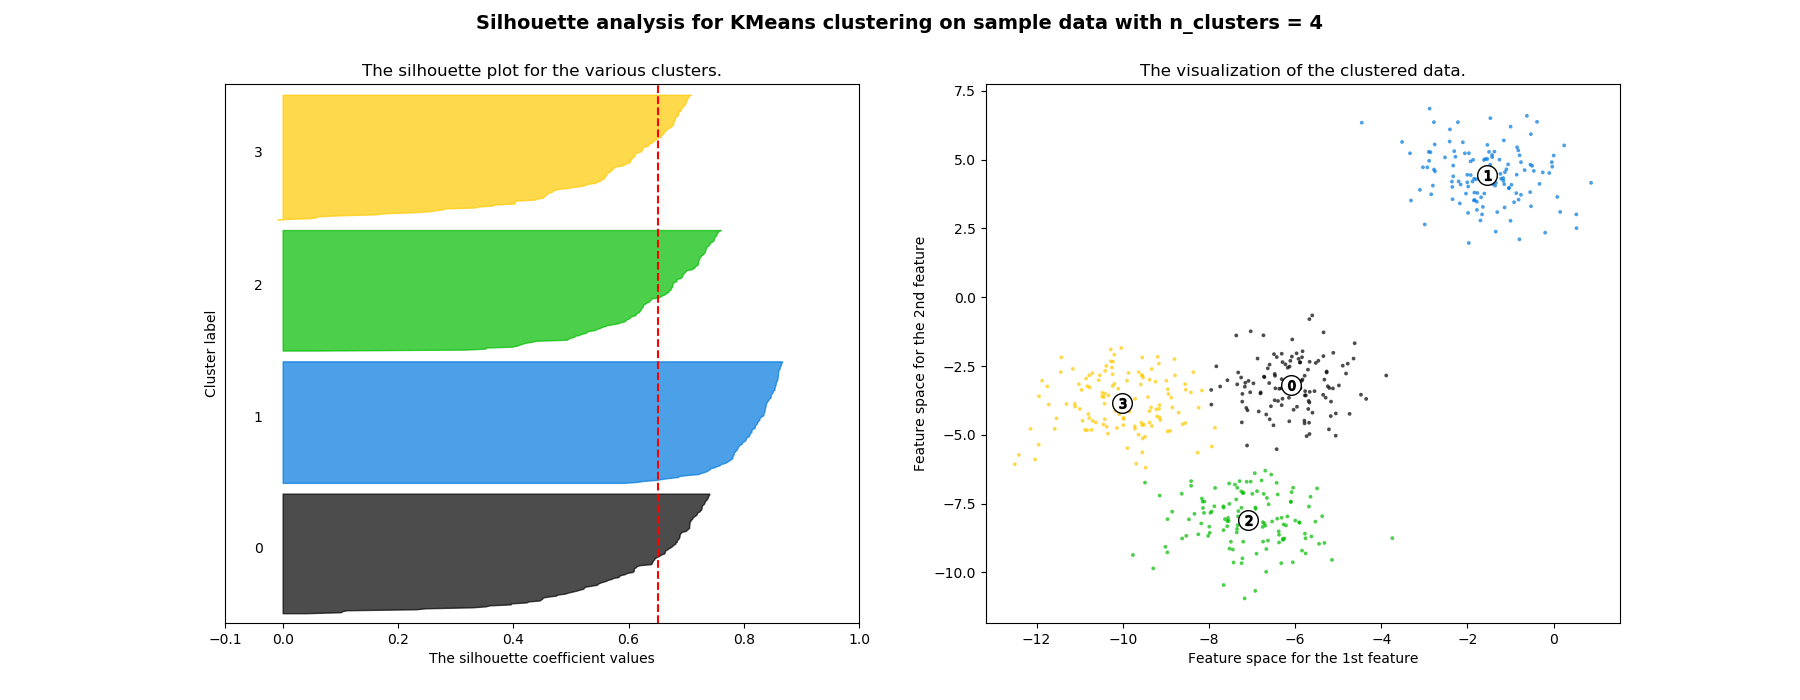

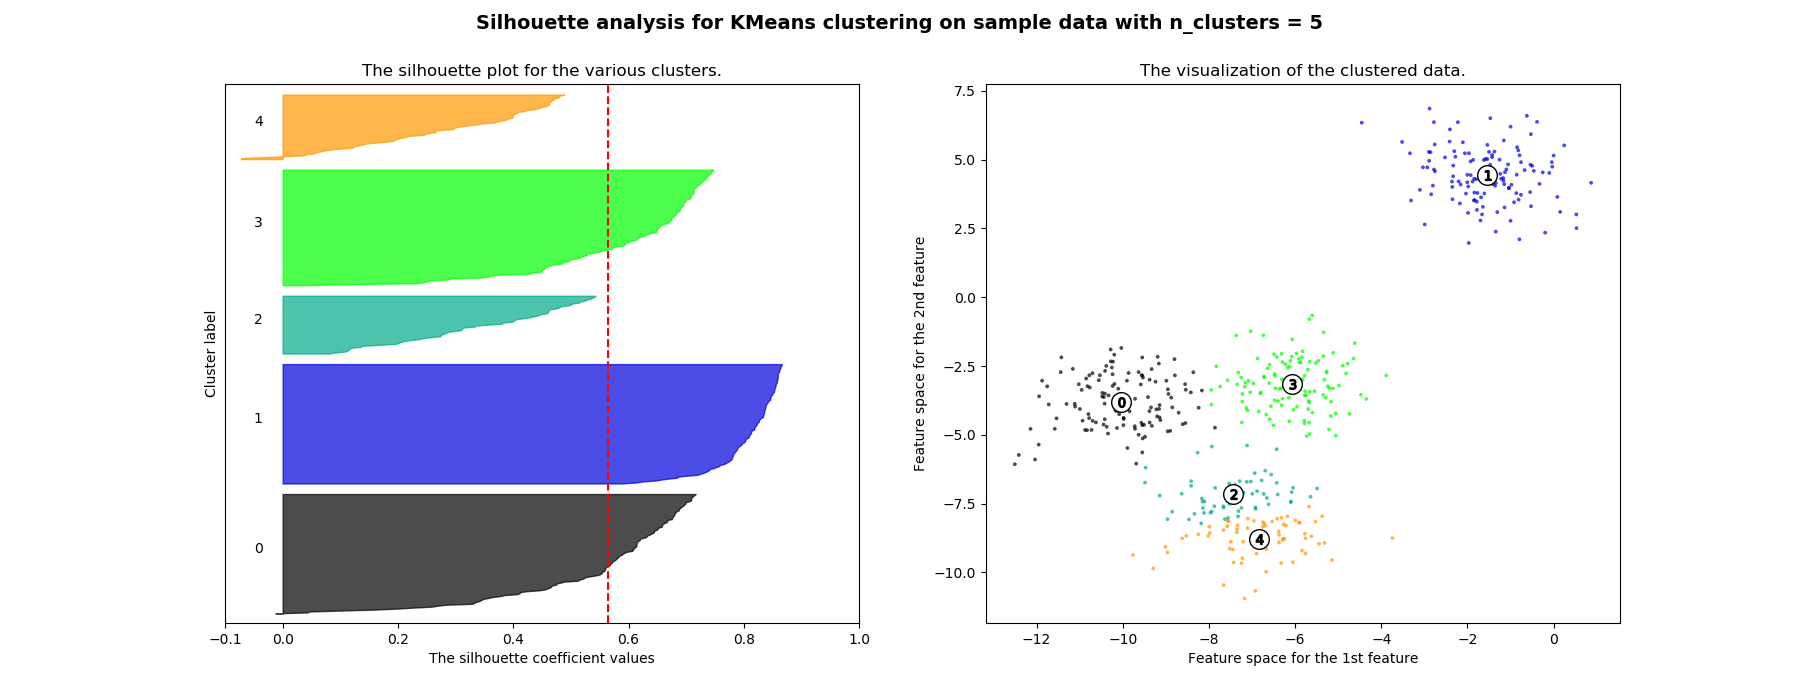

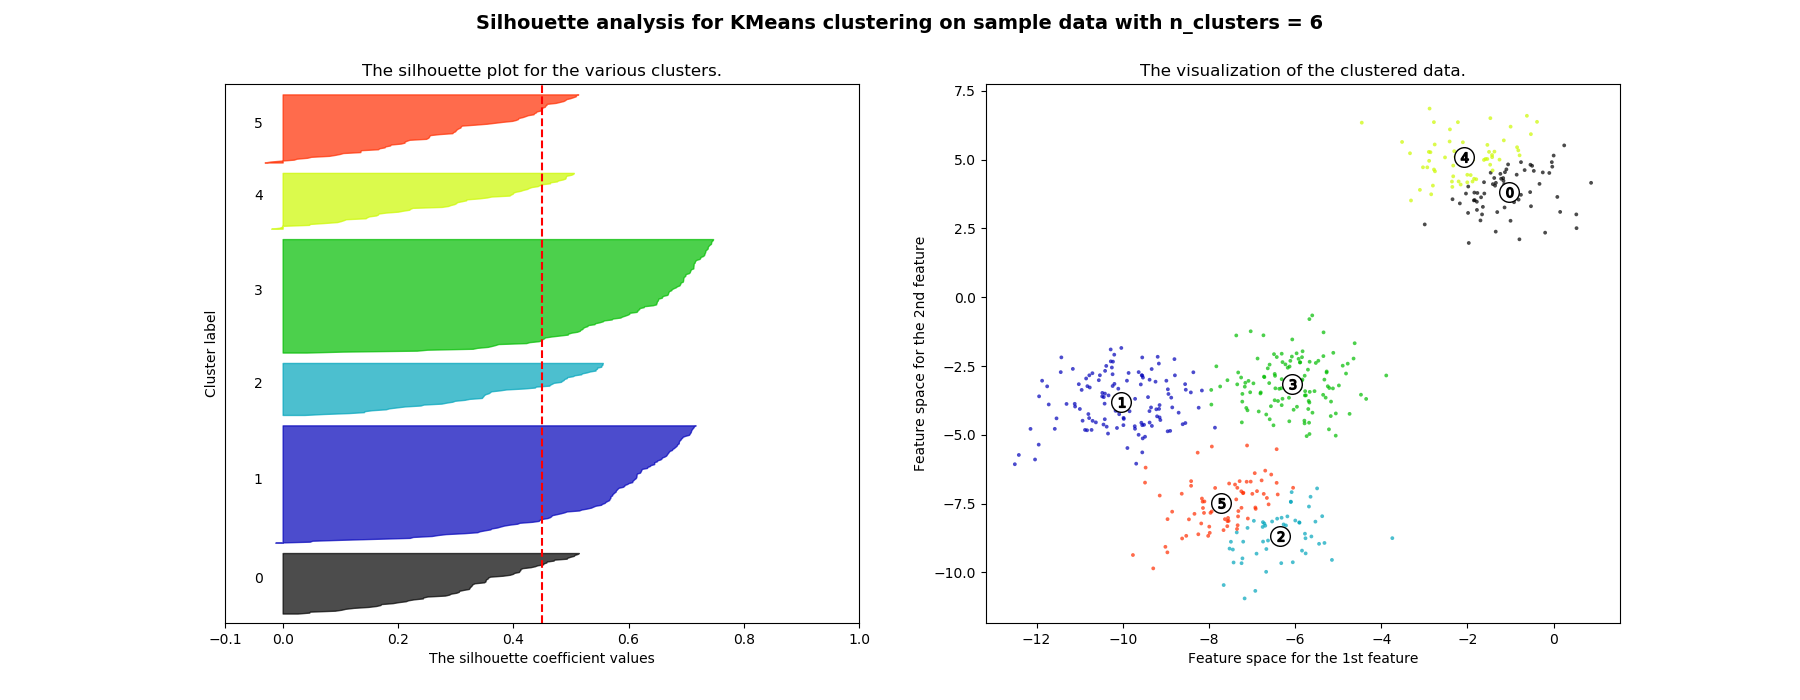

In [ ]:
# kume sayisini otomatik olarak cekmeye yarayacak kod. Kume sayisini bilmedigimizde faydalı
cluster_labels = np.unique(y) # kume etiketlerini cekelim

print('Labels')
print(cluster_labels)

print('Shape')
print(cluster_labels.shape)

n_clusters = cluster_labels.shape[0]  

print('Kume sayisi')
print(n_clusters)
# kac kumemiz oldugu bilgisini cekelim 
#(burada onceden tanimladigimiz degiskeni de kullanabilirdik)

## Silhouette Çıkarma Kodu

In [ ]:
silhouette_vals = silhouette_samples(X_pca, y, metric='euclidean')
print('silhouette vals:')
print(silhouette_vals)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):  # her bir kume icin 0,1,2 ...
    c_silhouette_vals = silhouette_vals[y == c] # su anki küme için
    c_silhouette_vals.sort() # değerleri sırala
    y_ax_upper += len(c_silhouette_vals) 
    color = cm.jet(float(i) / n_clusters) # bir renk sec
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.) # sol eksende kume numarasini nereye yazacagini hesapla
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)


print(silhouette_avg)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)   # 0.ci yazmasin, 1den baslasin
plt.ylabel('Küme')
plt.xlabel('Silhouette katsayısı')
plt.show()


Silhouette Katsayısı, her bir elemanın bulunduğu küme içindeki elemanlara olan ortalama uzaklığı (a) ve en yakın kümeye olan ortalama uzaklığın (b) farklarının a ve b nin maksimumuna bölümüyle bulunur.

(b - a) / max(a,b)

Silhouette katsayısı, örneklerin benzer örneklerle nekadar iyi kümelendiğini öğrenmek için kullanılır.

Yüksek bir silhouette katsayısı örneklerin kendi kümeleri ile yakın, diğer kümelerle uzak olduğunu gösterir.

-1 1 arasında değerler alabilir.

Silhouette_samples hakkinda detayli bilgi icin aşağıdaki linke basın: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html


Silhouette leri daha rahat cizip incelemek icin yukaridaki cabalarimizi bir fonksiyona kaydedelim.

In [ ]:
def silhouetteCizici(data,clusters):
    
    plt.figure(figsize=(10, 10))
    cluster_labels = np.unique(clusters) # kume etiketlerini cekelim

    print('Labels')
    print(cluster_labels)

    print('Shape')
    print(cluster_labels.shape)

    n_clusters = cluster_labels.shape[0]  

    print('Kume sayisi')
    print(n_clusters)
    
    silhouette_vals = silhouette_samples(data, clusters, metric='euclidean')

    print('silhouette vals:')
    #print(silhouette_vals)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):  # her bir kume icin 0,1,2 ...
        c_silhouette_vals = silhouette_vals[clusters == c] # su anki küme için
        c_silhouette_vals.sort() # değerleri sırala
        y_ax_upper += len(c_silhouette_vals) 
        color = cm.jet(float(i) / n_clusters) # bir renk sec
        plt.barh(range(y_ax_lower, y_ax_upper),
                c_silhouette_vals,
                height=1.0,
                edgecolor='none',
                color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)

    
    print(silhouette_avg)
    
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)   # 0.ci yazmasin, 1den baslasin
    plt.ylabel('Küme')
    plt.xlabel('Silhouette katsayısı')
    plt.show()

Gerçek verilerimizin silhouette garfiğini çizdirelim.

In [ ]:
# gercek degerlerin silhouette leri
# KOPYA_g_silhouette


Verilerimizi Normalize edelim

In [ ]:
#normalizasyon

normalized_data=(data-data.min())/(data.max()-data.min())

In [ ]:
normalized_data.head()
normalized_data.describe()

En guzeli hala guzel mi?

In [ ]:
inertialar = []  # bir liste olusturalim
K_lar = range(1, 30)  # 1 den 5 e, 6 dahil degil

for i in K_lar:    # her bir k degeri icin
    # Modelimizi yaratalim
    model = KMeans(
            n_clusters=i,     # sirayla 1,2,3,4,5
            init='k-means++',   # algoritma secimi
            # n_init=10,
            # max_iter=300,
            # n_jobs=-1,
            random_state=1)   # rastgele sayi ureteci
    
    model.fit(normalized_data) 
    inertialar.append(model.inertia_)  # her bir neticeyi bu listeye ekleyelim

plt.plot(K_lar, inertialar, marker='o')
plt.xlabel('Küme sayısı (k)')
plt.ylabel('Distortion')
plt.show()

In [ ]:
en_guzeli = 3

In [ ]:
# Once buldugumuz en uygun cluster sayisini kullaniyoruz.
model_k = KMeans(
    n_clusters=en_guzeli,
    init='k-means++',
    # n_init=10,
    # max_iter=300,
    # n_jobs=-1,
    random_state=1)

# fit with X instead of X_pca
model_k = model_k.fit(normalized_data)

y_final = model_k.predict(normalized_data)

y_kmeans = y_final

print('PCA olmadan ve normalize K Means Neticesi : ')
print(collections.Counter(y_final))



In [ ]:
silhouetteCizici(normalized_data,y_kmeans)

Kumeleme bilgilerini veri verimize ekleyelim. Daha sonra karsilastirma icin faydali olacak.


In [ ]:
y_final_df = pd.DataFrame(y_final, columns=['Raw_N_kmeans3'])  # tek sutun kumeleme neticelerini olustur
dataFull = pd.concat([dataFull, y_final_df], axis=1)          # kumeleme neticelerini datamiza ekle

In [ ]:
dataFull.head()


# Uygulama

K nın 2 den 7 a kadar olan değerleri için silhouettelerini çizin ve bir listeye kadedin

In [ ]:
raw_result = dataFull   # yeni bir veri yapisi olusturalim

veri = X_pca # data

ks = range(2,8)
#kumes = []
i = 0
for k in ks:
    model_k = KMeans(
    n_clusters=k,
    init='k-means++',
    # n_init=10,
    # max_iter=300,
    # n_jobs=-1,
    random_state=1)

    # fit with X instead of X_pca
    model_k = model_k.fit(veri)

    kumeler = model_k.predict(veri)
    print(collections.Counter(kumeler))
 
    #  veri setimize ekleyelim
    kumeler_df = pd.DataFrame(kumeler, columns=['means'+str(k)])


    raw_result = pd.concat([raw_result, kumeler_df], axis=1)          # ID LER OLMADAN RAW RESULT

    
    
    silhouetteCizici(veri, kumeler)

In [ ]:
raw_result.head()

Kümeleri analiz etmeye çalışalım.

In [ ]:
mcols = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','PCA_kmeans3']

In [ ]:
sns.pairplot( raw_result[mcols], hue='PCA_kmeans3')

# Agglomverative Kümeleme

In [ ]:
import pandas as pd
import numpy as np
import collections
import scipy.cluster.hierarchy as hier
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
plt.figure(figsize=(10, 10)) # resmimizin boyutlariyla oynayalim

dendrogram = hier.dendrogram(hier.linkage(X_pca, method ='ward'))
plt.title('Dendrogram')
plt.xlabel('çiçekler')
plt.ylabel('mesafeler')
plt.show()

In [ ]:
model = AgglomerativeClustering(n_clusters = 3, affinity ='euclidean', linkage ='ward')
y = model.fit_predict(X_pca)

Ward metodu yeni olusturulan kümede ortalama değerden uzaklığı en azda tutmaya çalışır. 
https://en.wikipedia.org/wiki/Ward%27s_method

In [ ]:
plt.figure(figsize=(10, 10))

plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 50, c = y, label = 'Kumeler', cmap='viridis')

plt.title('Kumeler')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('AgglomerativeClustering : ')
print(collections.Counter(y))

In [ ]:
silhouetteCizici(X_pca,y)

Listemize ekleyelim

In [ ]:
y_df = pd.DataFrame(y, columns=['agglo3'])

dataFull = pd.concat([dataFull, y_df], axis=1) 

In [ ]:
dataFull.head()

# DBSCAN

In [ ]:
#https://youtu.be/h53WMIImUuc
from IPython.lib.display import YouTubeVideo
YouTubeVideo('h53WMIImUuc')

In [ ]:
import pandas as pd
import numpy as np
import collections
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
model = DBSCAN(eps = 0.75, min_samples = 4, metric ='euclidean', n_jobs = 1)
y = model.fit_predict(X_pca)

In [ ]:
plt.figure(figsize=(15, 15))

plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 50, c = y, label = 'Kümeler', cmap = 'viridis')


plt.title('Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid()
plt.show()

print('DBSCAN w/ eps=0.9 Result : ')
print(collections.Counter(y))


In [ ]:
silhouetteCizici(X_pca,y)

En uygun epsilon değerini bulun.

Veri Setimize Ekleyelim

In [ ]:
y_df = pd.DataFrame(y, columns=['DBSCAN_25'])

dataFull = pd.concat([dataFull, y_df], axis=1) 

In [ ]:
dataFull.head()

In [ ]:
#dataFull = dataFull.drop('PCA_kmeans3', axis=1)  # Istemedigimiz sutun var ise bu kod ile silebiliriz

# Kümelerin incelenmesi

## NMI
Normalized Mutual Information

0 ortak hic bir bilgi yok, 1 birebir ayni bilgiyi veriyor.


In [ ]:

from sklearn.metrics.cluster import normalized_mutual_info_score

In [ ]:
normalized_mutual_info_score(dataFull.PCA_kmeans3, dataFull.Raw_N_kmeans3)   #target)

In [ ]:
normalized_mutual_info_score(dataFull.Raw_N_kmeans3, dataFull.target)

In [ ]:
normalized_mutual_info_score(dataFull.agglo3, dataFull.target)

In [ ]:
normalized_mutual_info_score(dataFull.DBSCAN_25, dataFull.target)

# Rand Index

Kümeler arasındaki benzerlikleri bulmak için kullanılan tekniklerden biri de Rand skorudur. Butun elemanlar için, ikili olarak aynı kümede olup olmadıklarına bakar.

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
adjusted_rand_score(dataFull.PCA_kmeans3, dataFull.target)

In [ ]:
adjusted_rand_score(dataFull.Raw_N_kmeans3, dataFull.target)

In [ ]:
adjusted_rand_score(dataFull.agglo3, dataFull.target)

In [ ]:
adjusted_rand_score(dataFull.DBSCAN_25, dataFull.target)

# İyileştirme - Uygulama

Petal ve Sepal bilgilerimiz var. Bunları ilk çizdirdiğimiz garfiğe bakalım. Sepal bilgisi bizim gerçekten işimize yarıyor mu? Bu çiçek türlerini ayrımada bir etkisi var mı?

Onları kullanmadan süreci baştan yapın.

## Kopyalar:

In [ ]:
# KOPYA TURLERI CIZDIRME
ax = data.plot.scatter(x='sepal length (cm)', y = 'sepal width (cm)', c='red',s=40, colormap='viridis')
plt.show()

In [ ]:
#KOPYA_g_pca
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 50, c = dataFull['target'], label = 'Türler', cmap='viridis')


In [ ]:
#KOPYA datayi_ustuste_gosterme
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 50, c = y, alpha=0.5,label = 'Kümeler',cmap='viridis')
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 50, c = dataFull['target'], alpha=0.5,label = 'Kümeler',cmap='viridis')


In [ ]:
# KOPYA_g_silhouette
silhouetteCizici(X_pca,dataFull.target)
silhouetteCizici(X_pca, dataFull['target'])